In [83]:
import cv2
import numpy as np
from collections import deque
import time
#from picamera2 import Picamera2, Preview
#from libcamera import controls
import threading

path = 'put path'
operation_active = threading.Event()
camera_lock = threading.Lock()  # Only allows one thread to access the camera

# Constants for frame center and offset
CENTER_X, CENTER_Y = 650 // 2, 100 // 2
OFFSET = 40  # Half of the side length of the 100x100 area

# Randomly selects 30 (x, y) pixels within the defined area
random_coords = [
    (np.random.randint(CENTER_X - OFFSET, CENTER_X + OFFSET),
     np.random.randint(CENTER_Y - OFFSET, CENTER_Y + OFFSET)) for _ in range(30)
]

def measure_color_change(frame, pixels):
    """
    Extract the RGB values of the specified pixels for a given frame
    and returns the average color values.
    """
    color_values = []
    for x, y in pixels:
        color_values.extend(frame[y, x])
    return np.mean(color_values)
'''
def initialize_camera():
    #Initializes and configures the Picam with preview settings.
    picam2 = Picamera2()
    camera_config = picam2.create_preview_configuration()
    picam2.configure(camera_config)
    return picam2
'''
def capture_frame(frame):
    #Captures a single frame from the camera
    #frame = picam2.capture_array()
    frame_bw = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return cv2.cvtColor(frame_bw, cv2.COLOR_GRAY2RGB)

def calculate_offset(temp_array):
    #Calculatea the baseline offset value from the mean of the temporary array
    base_val = np.mean(temp_array)
    return base_val - 60  # Adjust detection sensitivity as needed

def process_frame(frame, pixels_to_measure, temp_array, stdev_array, offset, frame_size, start_time):
    """
    Process a single frame: captures, converts, and measures the color change.
    Updates the temp_array and checks for standard deviation threshold.
    """
    frame_rgb = frame
    mean_color_value = measure_color_change(frame_rgb, pixels_to_measure)
    temp_array.append(mean_color_value)

    if len(temp_array) == temp_array.maxlen:
        if frame_size == (temp_array.maxlen - 1):
            offset = calculate_offset(temp_array)

        adjusted_mean = np.mean(temp_array) - offset
        if adjusted_mean > 80:  # Threshold for mean value
            stdev = np.std(np.array(temp_array) - offset)
            stdev_array.append(stdev)
            print(f"Stdev is: {stdev}")
            if stdev < 1.5:  # Threshold for standard deviation indicating stabilization
                elapsed_time = time.time() - start_time
                print(f"Time measured through framesize: {frame_size / 30:.2f}")
                print(f"Time in seconds: {elapsed_time:.2f}")
                return False  # Stop processing as reaction is complete

    return True  # Continue processing

def running_alg():
    """Run the main algorithm to monitor color change and detect the reaction completion."""
    #with camera_lock:
    # Initialize camera and data structures
    #picam2 = initialize_camera()
    #picam2.start_preview(Preview.QTGL)
    #picam2.start()
    time.sleep(1)
    temp_array = deque(maxlen=500)
    stdev_array = []
    frame_size = 0
    offset = 0
    start_time = time.time()
    pixels_to_measure = random_coords
    cap = cv2.VideoCapture(path)
   
    print("I am in the loop!!!!")
    while cap.isOpened():
        
        ret, frame = cap.read()
        if not ret:
            print("Failed to find a stopping point")
            break

        if not process_frame(frame, pixels_to_measure, temp_array, stdev_array, offset, frame_size, start_time):
            break  # Stop processing if reaction is detected as complete
        frame_size += 1




#need to implement: main thread that captures video data
# worker threads that work on their specific location in the frame (avoiding the pill)


In [84]:
running_alg()

I am in the loop!!!!
Stdev is: 9.225593715070891
Stdev is: 9.258863649204901
Stdev is: 9.29427800956117
Stdev is: 9.329480155525584
Stdev is: 9.363105459933
Stdev is: 9.39166025998664
Stdev is: 9.421850517720582
Stdev is: 9.463200856338588
Stdev is: 9.492979145078161
Stdev is: 9.518085682621711
Stdev is: 9.5501413172661
Stdev is: 9.582466708358037
Stdev is: 9.610147990767075
Stdev is: 9.639365326041382
Stdev is: 9.674727634562274
Stdev is: 9.702076164498422
Stdev is: 9.725158197323216
Stdev is: 9.752206501829265
Stdev is: 9.786777639369822
Stdev is: 9.81188122851419
Stdev is: 9.835564076388335
Stdev is: 9.861749587468031
Stdev is: 9.884859239173393
Stdev is: 9.90494746899027
Stdev is: 9.930201190979632
Stdev is: 9.960955206588086
Stdev is: 9.985993302003276
Stdev is: 10.001007849927976
Stdev is: 10.024465040102983
Stdev is: 10.045635797686131
Stdev is: 10.07120215343276
Stdev is: 10.095290930960868
Stdev is: 10.133378534889438
Stdev is: 10.165302303108366
Stdev is: 10.196801237933684
S

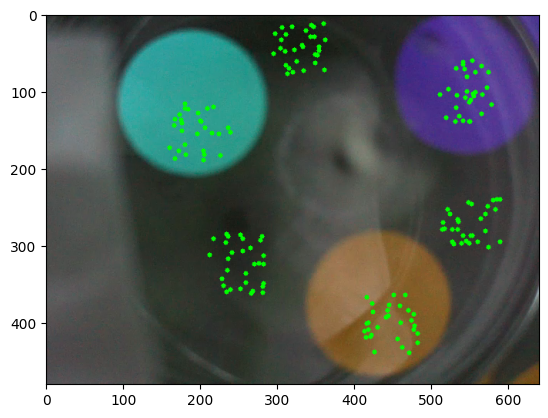

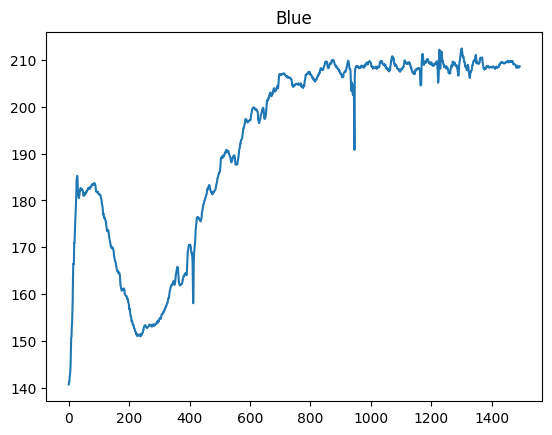

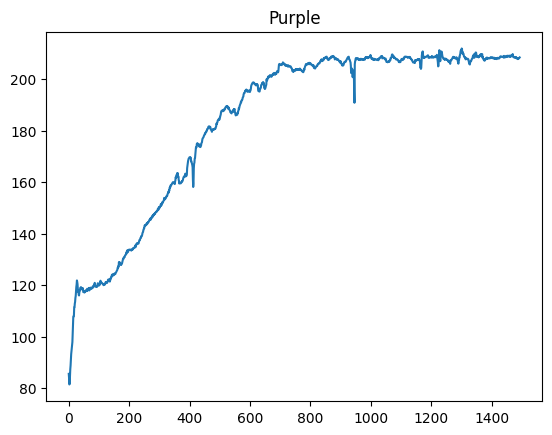

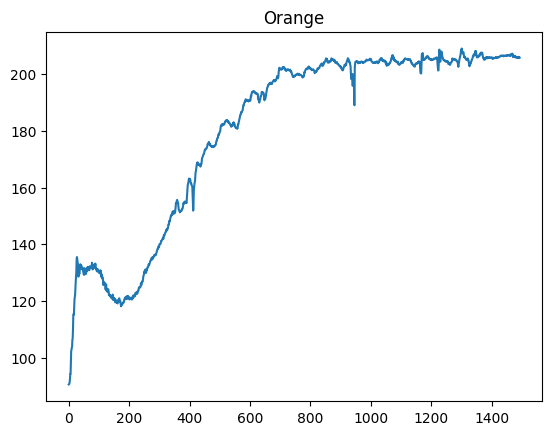

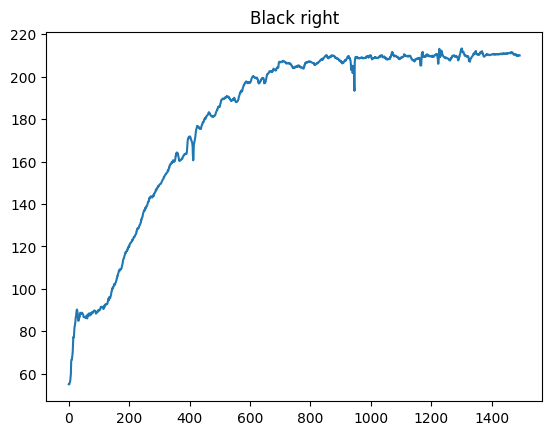

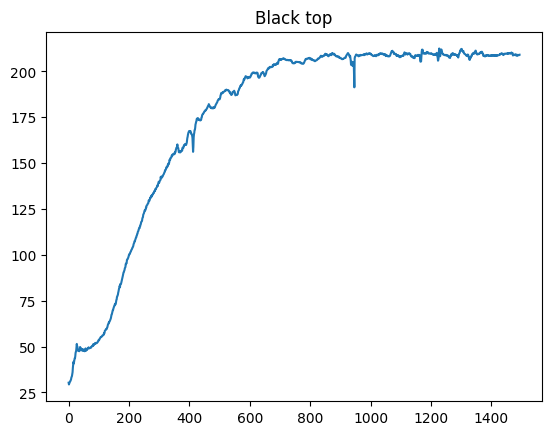

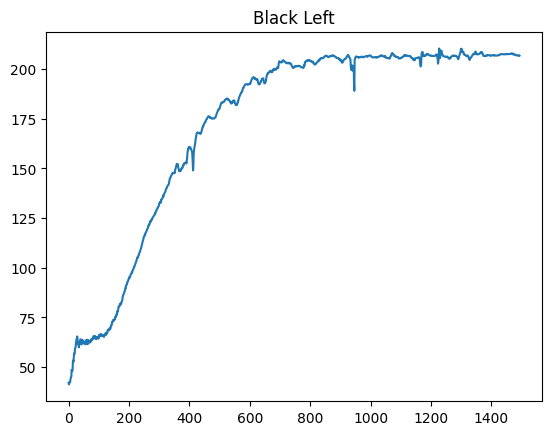

In [69]:
import cv2
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

CENTER_X1, CENTER_Y1 = 400 // 2, 300 // 2
OFFSET1 = 40  # Half of the side length of the 100x100 area
#blue
CENTER_X2, CENTER_Y2 = 1100 // 2, 200 // 2
OFFSET2 = 40  # Half of the side length of the 100x100 area
#purple
CENTER_X3, CENTER_Y3 = 900 // 2, 800 // 2
OFFSET3 = 40  # Half of the side length of the 100x100 area
#orange
CENTER_X4, CENTER_Y4 = 1100 // 2, 540 // 2
OFFSET4 = 40  # Half of the side length of the 100x100 area
#black right
CENTER_X5, CENTER_Y5 = 650 // 2, 100 // 2
OFFSET5 = 40 
#black top
CENTER_X6, CENTER_Y6 = 500 // 2, 650 // 2
OFFSET6 = 40 
#black left


all_coord = [
    [  # random_coords1
        (
            np.random.randint(CENTER_X1 - OFFSET1, CENTER_X1 + OFFSET1),
            np.random.randint(CENTER_Y1 - OFFSET1, CENTER_Y1 + OFFSET1)
        ) for _ in range(30)
    ],
    [  # random_coords2
        (
            np.random.randint(CENTER_X2 - OFFSET2, CENTER_X2 + OFFSET2),
            np.random.randint(CENTER_Y2 - OFFSET2, CENTER_Y2 + OFFSET2)
        ) for _ in range(30)
    ],
    [  # random_coords3
        (
            np.random.randint(CENTER_X3 - OFFSET3, CENTER_X3 + OFFSET3),
            np.random.randint(CENTER_Y3 - OFFSET3, CENTER_Y3 + OFFSET3)
        ) for _ in range(30)
    ],
    [  # random_coords4
        (
            np.random.randint(CENTER_X4 - OFFSET4, CENTER_X4 + OFFSET4),
            np.random.randint(CENTER_Y4 - OFFSET4, CENTER_Y4 + OFFSET4)
        ) for _ in range(30)
    ],
    [  # random_coords5
        (
            np.random.randint(CENTER_X5 - OFFSET5, CENTER_X5 + OFFSET5),
            np.random.randint(CENTER_Y5 - OFFSET5, CENTER_Y5 + OFFSET5)
        ) for _ in range(30)
    ],

      [  # random_coords5
        (
            np.random.randint(CENTER_X6 - OFFSET6, CENTER_X6 + OFFSET6),
            np.random.randint(CENTER_Y6 - OFFSET6, CENTER_Y6 + OFFSET6)
        ) for _ in range(30)
    ],

]

path = '/Users/patrickwilson/Desktop/CHEM_E_REPO/Chem-E/tests/5ST15H2O/test1.mp4'


def measure_color_change(frame, pixels):
    """
    Extract the RGB values of the specified pixels for a given frame
    and returns the average color values.
    """
    color_values = []
    for x, y in pixels:
        color_values.extend(frame[y, x])
    return np.mean(color_values)

color = (0, 255, 0)
def show_coords(path, frame):
    cap = cv2.VideoCapture(path)

    ret, frame = cap.read(frame)
    for random_coords in all_coord:
        for (x, y) in random_coords:
            top_left = (x, y)#(x - OFFSET1, y - OFFSET1)
            bottom_right = (x, y)#(x + OFFSET1, y + OFFSET1)
            frame = cv2.rectangle(frame, top_left, bottom_right, color, 5)
    plt.figure()
    plt.imshow(frame)

def display_pixel_values_for_random_coords(random_coords, path, title):
    cap = cv2.VideoCapture(path)
    arr = []


    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_bw = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = cv2.cvtColor(frame_bw, cv2.COLOR_GRAY2RGB)
    
        arr.append(measure_color_change(frame, random_coords))
    plt.figure()
    plt.title(title)
    plt.plot(arr)
    
show_coords(path, 100)
display_pixel_values_for_random_coords(all_coord[0], path, "Blue")
display_pixel_values_for_random_coords(all_coord[1], path, "Purple")
display_pixel_values_for_random_coords(all_coord[2], path, "Orange")
display_pixel_values_for_random_coords(all_coord[3], path, "Black right")
display_pixel_values_for_random_coords(all_coord[4], path, "Black top")
display_pixel_values_for_random_coords(all_coord[5], path, "Black Left")


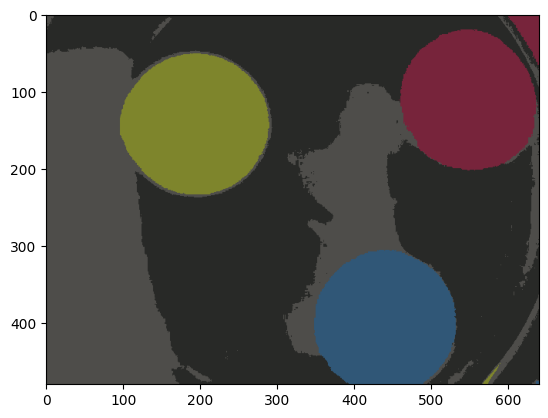

: 

In [120]:

cap = cv2.VideoCapture(path)


i = 0
while i != 100:
    i += 1
    cap.read()
ret, frame = cap.read()



def attempt_kmeans(image):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pixel_vals = image.reshape((-1, 3))

    pixel_vals = np.float32(pixel_vals)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, .6)

    k = 5

    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)

    segmented_data = centers[labels.flatten()]

    segmented_image = segmented_data.reshape((image.shape))

    plt.imshow(segmented_image)


attempt_kmeans(frame)

